In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
#creating a function to download data from yahoo finance
def download_stock_data(ticker,start,end):
    data=yf.download(ticker,start,end)
    return data

In [6]:
#providing ticker start and end date 
ticker2= 'TSLA'
start2 =dt.datetime(2012,12,12)
end2=dt.datetime(2022,12,12)

In [7]:
tsla=download_stock_data(ticker=ticker2,start=start2,end=end2)

[*********************100%***********************]  1 of 1 completed


In [8]:
tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-12,2.347333,2.386667,2.330000,2.350667,2.350667,30957000
2012-12-13,2.350667,2.353333,2.183333,2.240667,2.240667,32269500
2012-12-14,2.252000,2.293333,2.239333,2.254000,2.254000,15345000
2012-12-17,2.251333,2.300000,2.250000,2.293333,2.293333,12373500
2012-12-18,2.284000,2.338000,2.284000,2.306000,2.306000,23308500
...,...,...,...,...,...,...
2022-12-05,189.440002,191.270004,180.550003,182.449997,182.449997,93122700
2022-12-06,181.220001,183.649994,175.330002,179.820007,179.820007,92150800
2022-12-07,175.029999,179.380005,172.220001,174.039993,174.039993,84213300


In [11]:
#calculating percenatge change on the closing price 
#creating a column call %-change
tsla['%-chg']=tsla['Close'].pct_change()

In [12]:
tsla.head()#as u can see below the %chg ie (2.240667-2.350667)/2.350667 =-0.046795
#(2ndrow-1st row )/1st row only for the whole close col 

,Open,High,Low,Close,Adj Close,Volume,%-chg
Date,,,,,,,
2012-12-12,2.347333,2.386667,2.330000,2.350667,2.350667,30957000,NaN
2012-12-13,2.350667,2.353333,2.183333,2.240667,2.240667,32269500,-0.046795
2012-12-14,2.252000,2.293333,2.239333,2.254000,2.254000,15345000,0.005950
2012-12-17,2.251333,2.300000,2.250000,2.293333,2.293333,12373500,0.017450
2012-12-18,2.284000,2.338000,2.284000,2.306000,2.306000,23308500,0.005523


In [14]:
#now calculate log return we need to get the volatility(std) of the stock
#creating a column call log return
tsla['Log_returns']=np.log(tsla['Close']/tsla['Close'].shift())

In [15]:
tsla.head()#as we can see that there is not much diff bet the %chg and logrtn
#the reason to use logrtn is coz is better for the big calculation later

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log_returns
Date,,,,,,,,
2012-12-12,2.347333,2.386667,2.330000,2.350667,2.350667,30957000,NaN,NaN
2012-12-13,2.350667,2.353333,2.183333,2.240667,2.240667,32269500,-0.046795,-0.047925
2012-12-14,2.252000,2.293333,2.239333,2.254000,2.254000,15345000,0.005950,0.005933
2012-12-17,2.251333,2.300000,2.250000,2.293333,2.293333,12373500,0.017450,0.017300
2012-12-18,2.284000,2.338000,2.284000,2.306000,2.306000,23308500,0.005523,0.005508


In [16]:
#calculating annual std for the tsla stock
#formula std annual = std daily * square root of 252
#as there are 252trading days in a year


In [17]:
#caluculating daily std
tsla['Log_returns'].std()


0.03562902970867547

In [36]:
#applying formula to get annual std
volatilty=tsla['Log_returns'].std() * 252**0.5#sqaureroot means half i.e0.5

In [37]:
volatilty

0.5655933123821243

In [35]:
str_vol = str(round(volatilty,4)*100)

In [38]:
str_vol

'56.56'

<IPython.core.display.Javascript object>


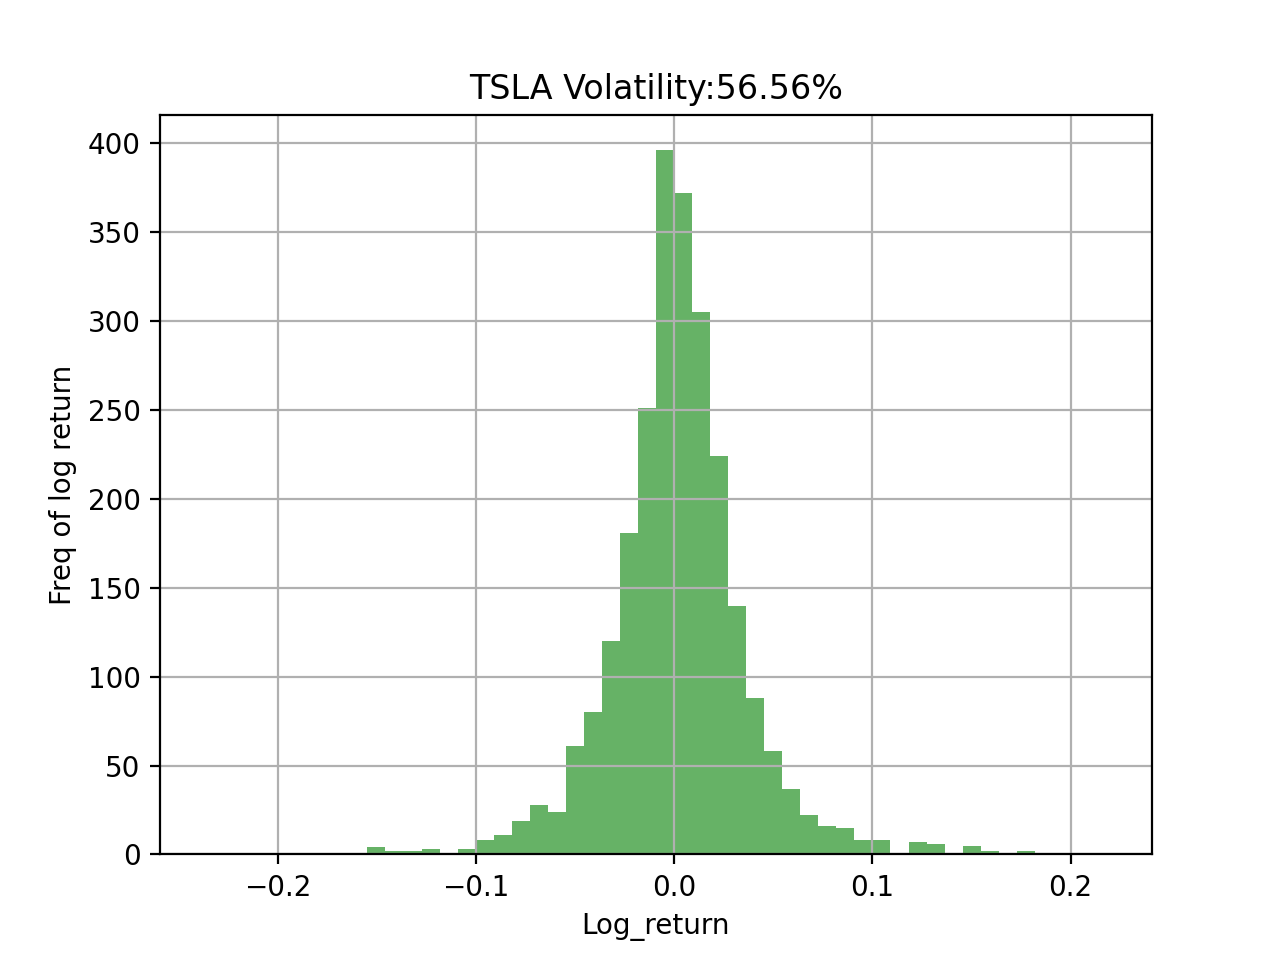

Text(0.5, 1.0, 'TSLA Volatility:56.56%')

In [39]:
fig,ax=plt.subplots()
tsla['Log_returns'].hist(ax=ax,bins=50,alpha=0.6,color='g')
ax.set_xlabel('Log_return')
ax.set_ylabel("Freq of log return")
ax.set_title("TSLA Volatility:" + str_vol + "%" )

#form the diagram we can say that Tesla stock is less volatile good to invest in 

In [40]:
#calculating moving average 
#moving average capture the average change in a dataframe overtime 
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log_returns
Date,,,,,,,,
2012-12-12,2.347333,2.386667,2.330000,2.350667,2.350667,30957000,NaN,NaN
2012-12-13,2.350667,2.353333,2.183333,2.240667,2.240667,32269500,-0.046795,-0.047925
2012-12-14,2.252000,2.293333,2.239333,2.254000,2.254000,15345000,0.005950,0.005933
2012-12-17,2.251333,2.300000,2.250000,2.293333,2.293333,12373500,0.017450,0.017300
2012-12-18,2.284000,2.338000,2.284000,2.306000,2.306000,23308500,0.005523,0.005508


In [41]:
tsla['MA21']=tsla['Close'].rolling(21).mean()#rolling function takes 21 days mean to 
#to get the moving average


In [42]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log_returns,MA21
Date,,,,,,,,,
2012-12-12,2.347333,2.386667,2.330000,2.350667,2.350667,30957000,NaN,NaN,NaN
2012-12-13,2.350667,2.353333,2.183333,2.240667,2.240667,32269500,-0.046795,-0.047925,NaN
2012-12-14,2.252000,2.293333,2.239333,2.254000,2.254000,15345000,0.005950,0.005933,NaN
2012-12-17,2.251333,2.300000,2.250000,2.293333,2.293333,12373500,0.017450,0.017300,NaN
2012-12-18,2.284000,2.338000,2.284000,2.306000,2.306000,23308500,0.005523,0.005508,NaN


In [55]:
tsla

,Open,High,Low,Close,Adj Close,Volume,%-chg,Log_returns,MA21
Date,,,,,,,,,
2012-12-12,2.347333,2.386667,2.330000,2.350667,2.350667,30957000,NaN,NaN,NaN
2012-12-13,2.350667,2.353333,2.183333,2.240667,2.240667,32269500,-0.046795,-0.047925,NaN
2012-12-14,2.252000,2.293333,2.239333,2.254000,2.254000,15345000,0.005950,0.005933,NaN
2012-12-17,2.251333,2.300000,2.250000,2.293333,2.293333,12373500,0.017450,0.017300,NaN
2012-12-18,2.284000,2.338000,2.284000,2.306000,2.306000,23308500,0.005523,0.005508,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-05,189.440002,191.270004,180.550003,182.449997,182.449997,93122700,-0.063687,-0.065805,187.146666
2022-12-06,181.220001,183.649994,175.330002,179.820007,179.820007,92150800,-0.014415,-0.014520,185.830000
2022-12-07,175.029999,179.380005,172.220001,174.039993,174.039993,84213300,-0.032143,-0.032671,184.732856


In [56]:
tsla['EMA21']=tsla['Close'].ewm(span=21,adjust=False).mean()
#calulating exponential moving average

<IPython.core.display.Javascript object>


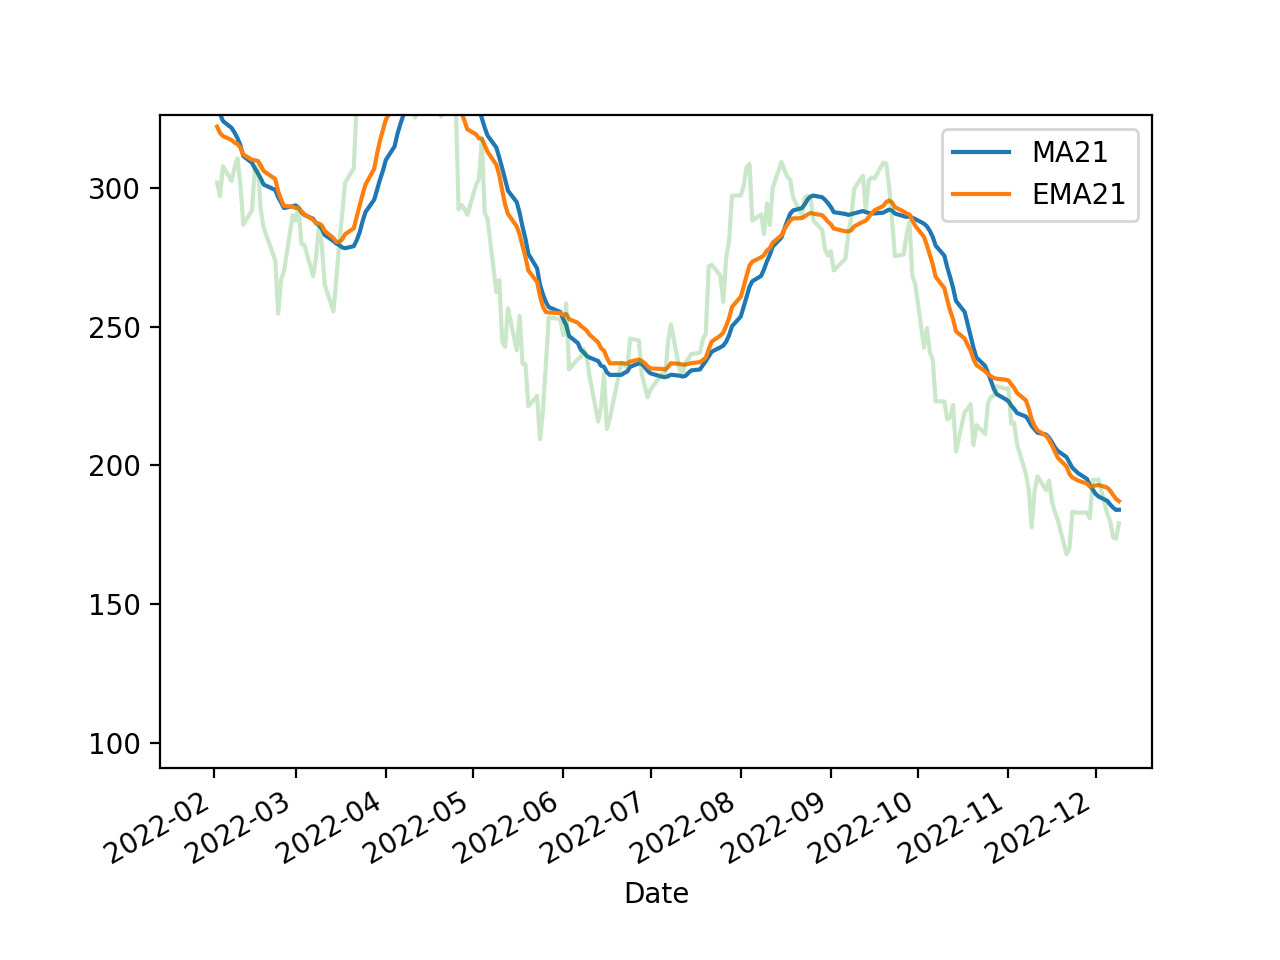

<AxesSubplot:xlabel='Date'>

In [62]:
fig, ax=plt.subplots()
tsla[['MA21','EMA21']].loc['2022-2-2':].plot(ax=ax)
tsla["Close"].loc['2022-2-2':].plot(ax=ax,alpha=0.25)